# ICRANet-ISFAHAN Astronomy Meeting (Hands on Workshop)

These notes are taken from Data-Driven Astronomy course offered by the University of Sydney. (https://www.coursera.org/learn/data-driven-astronomy)

# Building a regression classifier

In this activity, we're going to use decision trees to determine the redshifts of galaxies from their photometric colours. We'll use galaxies where accurate spectroscopic redshifts have been calculated as our gold standard. We will learn how to assess the accuracy of the decision trees predictions and have a look at validation of our model.
This activity is based on the scikit-learn example on Photometric Redshifts of Galaxies.

# Magnitudes and colours

We will be using flux magnitudes from the Sloan Digital Sky Survey (SDSS) catalogue to create colour indices. Flux magnitudes are the total flux (or light) received in five frequency bands (u, g, r, i and z).

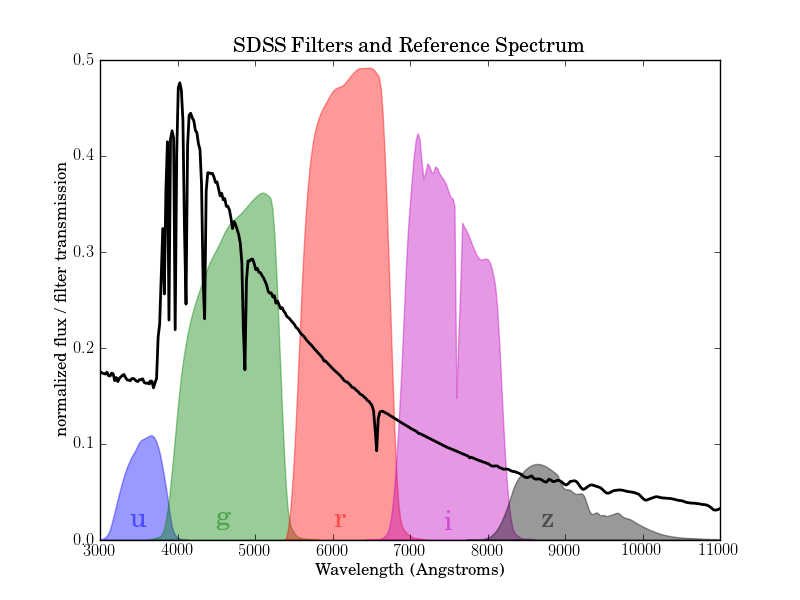

The astronomical colour (or colour index) is the difference between the magnitudes of two filters, i.e. u - g or i - z.

This index is one way to characterise the colours of galaxies. For example, if the u-g index is high then the object is brighter in ultra violet frequencies than it is in visible green frequencies.

Colour indices act as an approximation for the spectrum of the object and are useful for classifying stars into different types.

# What data do we need?

To calculate the redshift of a distant galaxy, the most accurate method is to observe the optical emission lines and measure the shift in wavelength. However, this process can be time consuming and is thus infeasible for large samples.

For many galaxies we simply don't have spectroscopic observations.

Instead, we can calculate the redshift by measuring the flux using a number of different filters and comparing this to models of what we expect galaxies to look like at different redshifts.

In this activity, we will use machine learning to obtain photometric redshifts for a large sample of galaxies. We will use the colour indices (u-g, g-i, r-i and i-z) as our input and a subset of sources with spectroscopic redshifts as the training dataset.

# Decision tree algorithms

Decision trees are a tool that can be used for both classification and regression. In this module we will look at regression, however, in the next module we will see how they can be used as classifiers.

Decision trees map a set of input features to their corresponding output targets. This is done through a series of individual decisions where each decision represents a node (or branching) of the tree.
Each node represents a decision that the robot needs to make (or assess) to reach a final decision.

# Decision trees for regression

In decision trees for real-world tasks, each decision is typically more complex, involving measured values, not just categories.

The output of regression is a real number. So, instead of the two outputs of Play and Don't Play we have a probability of whether we will play that day.

The decision at each branch is determined from the training data by the decision tree learning algorithm. Each algorithm employs a different metric (e.g. Gini impurity or information gain) to find the decision that splits the data most effectively.

For now, just need to know that a decision tree is a series of decisions, each made on a single feature of the data. The end point of all the branches is a set of desired target values.

# Decision trees in Python

The inputs to our decision tree are the colour indices from photometric imaging and our output is a photometric redshift. Our training data uses accurate spectroscopic measurements.

The decision tree will look something like the following.

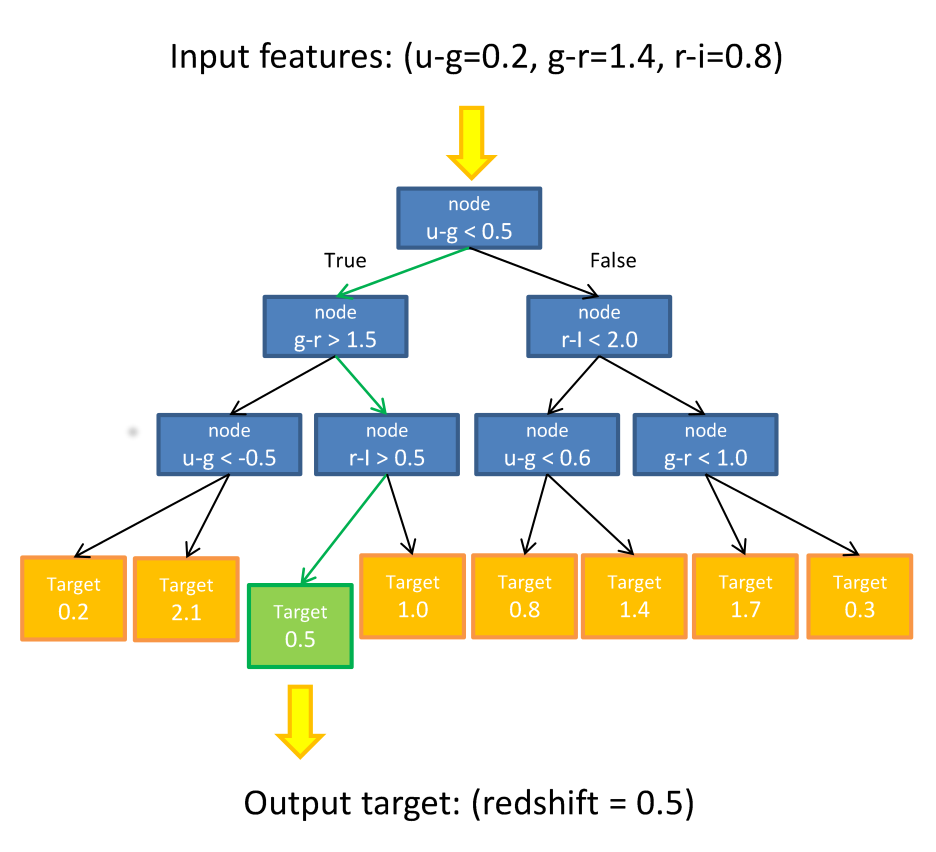

We can see how our calculated colour indices are input as features at the top and through a series of decision nodes a target redshift value is reached and output.

We will be using the Python machine learning library scikit-learn which provides several machine learning algorithms.

The scikit-learn decision tree regression takes a set of input features and the corresponding target values, and constructs a decision tree model that can be applied to new data.

# Sloan Digital Sky Survey data

We have provided the Sloan data in NumPy binary format (.npy) in a file called sdss_galaxy_colors.npy. The Sloan data is stored in a NumPy structured array and looks like this:

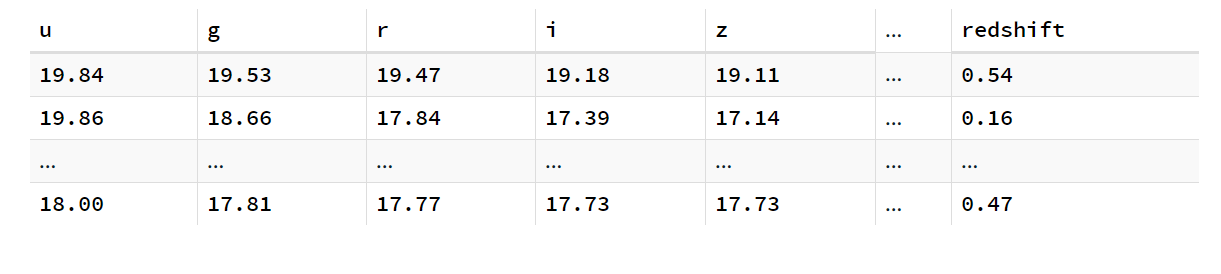

It also include spec_class and redshift_err columns we don't need in this activity. The data can be loaded using:

In [ ]:
import numpy as np
data = np.load('File location\sdss_galaxy_colors.npy')
print(data[0])

Attention: Make sure you download the dataset and save it in a specific path in your system. Copy that location in the code above.

The data[0] corresponds to the first row of the table above. Individual named columns can be accessed like this:

In [ ]:
import numpy as np
data = np.load('File location\sdss_galaxy_colors.npy')
print(data['u'])

Each flux magnitude column can be accessed in the data array as data['u'], data['g'] etc. The redshifts can accessed with data['redshift'].

# Features and Targets

Write a get_features_targets function that splits the training data into input features and their corresponding targets. In our case, the inputs are the 4 colour indices and our targets are the corresponding redshifts.

Your function should return a tuple of:

features: a NumPy array of dimensions m ⨉ 4, where m is the number of galaxies; targets: a 1D NumPy array of length m, containing the redshift for each galaxy. The data argument will be the structured array described on the previous slide. The u flux magnitudes and redshifts can be accessed as a column with data['u'] and data['redshift'].

The four features are the colours u - g, g - r, r - i and i - z. To calculate the first column of features, subtract the u and g columns, like this:

In [ ]:
import numpy as np
data = np.load('File location\sdss_galaxy_colors.npy')
print(data['u'] - data['g'])

Hint: set up your features array with zeros You can set up the features array with zeros and then set each column to the corresponding calculated feature.

In [ ]:
features = np.zeros((data.shape[0], 4))
features[:, 0] = data['u'] - data['g']

We create a empty numpy array with numpy.zeros() of the shape
m x n . Using numpy's vector algebra operations and the ':' index we assign the calculated colours to the corresponding column of the features array.

In [ ]:
import numpy as np

def get_features_targets(data):
  features = np.zeros(shape=(len(data), 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets


if __name__ == "__main__":
  # load the data
  data = np.load('F:\Online Courses\Data-driven Astronomy\WEEK 5\Python practice\sdss_galaxy_colors.npy')
    
  # call our function 
  features, targets = get_features_targets(data)
    
  # print the shape of the returned arrays
  print(features[:2])
  print(targets[:2])

# Decision Tree Regressor

We are now going to use our features and targets to train a decision tree and then make a prediction. We are going to use the DecisionTreeRegressor class from the sklearn.tree module.

The decision tree regression learning algorithm is initialised with:

In [ ]:
dtr = DecisionTreeRegressor()

We will discuss some optimisations later in the activity, but for now we are just going to use the default values.

To train the model, we use the fit method with the features and targets we created earlier:

In [ ]:
dtr.fit(features, targets)

The decision tree is now trained and ready to make a prediction:

In [ ]:
predictions = dtr.predict(features)

predictions is an array of predicted values corresponding to each of the input variables in the array.

Your task is to put this together for our photometric redshift data. Copy your get_features_targets from the previous problem. Use the comments to guide your implementation.

Finally, print the first 4 predictions. It should print this:

In [ ]:
[ 0.539301    0.1645703   0.04190006  0.04427702]

Here we follow each of the steps in the problem description, replacing x and y with our features and targets arrays. The only addition is to sort the resulting predicted_redshifts array and print the first element. Note that the numpy sort() function acts in place and there is no returns value.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# copy in your get_features_targets function here
def get_features_targets(data):
  features = np.zeros(shape=(len(data), 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# load the data and generate the features and targets
data = np.load('File location\sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)
  
# initialize model
dtr = DecisionTreeRegressor()

# train the model
dtr.fit(features, targets)

# make predictions using the same features
predictions = dtr.predict(features)

# print out the first 4 predicted redshifts
print(predictions[:4])

# Evaluating our results: accuracy

So we trained a decision tree! Great...but how do we know if the tree is actually any good at predicting redshifts?

In regression we compare the predictions generated by our model with the actual values to test how well our model is performing. The difference between the predicted values and actual values (sometimes referred to as residuals) can tell us a lot about where our model is performing well and where it is not.

While there are a few different ways to characterise these differences, in this tutorial we will use the median of the differences between our predicted and actual values. This is given by:

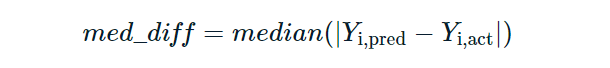

# Calculating the median difference

In this problem we will implement the function median_diff. The function should calculate the median residual error of our model, i.e. the median difference between our predicted and actual redshifts.

The median_diff function takes two arguments – the predicted and actual/target values. When we use this function later in the tutorial, these will corresponding to the predicted redshifts from our decision tree and their corresponding measured/target values.

The median of differences should be calculated according to the formula:

To calculate the median_diff we use NumPy's median and abs functions.

In [ ]:
import numpy as np


# Write a function that calculates the median of the differences between our predicted and actual values
def median_diff(predicted, actual):
  return np.median(np.abs(predicted[:] - actual[:]))

if __name__ == "__main__":
  # load testing data
  targets = np.load('targets.npy')
  predictions = np.load('predictions.npy')

  # call your function to get the median difference between the predicted values and the target values
  diff = median_diff(predictions, targets)

  # print the median difference
  print("Median difference: {:0.3f}".format(diff))

# Evaluating our results: validation

We previously used the same data for training and testing our decision trees.

This gives an unrealistic estimate of how accurate the model will be on previously unseen galaxies because the model has been optimised to get the best results on the training data.

The simplest way to solve this problem is to split our data into training and testing subsets:

In [ ]:
# initialise and train the decision tree
dtr = DecisionTreeRegressor()
dtr.fit(train_features, train_targets)

# get a set of prediction from the test input features
predictions = dtr.predict(test_features)

# compare the accuracy of the pediction againt the actual values
print(calculate_rmsd(predictions, test_targets))

This method of validation is the most basic approach to validation and is called held-out validation. We will use the med_diff accuracy measure and hold-out validation in the next problem to assess the accuracy of our decision tree.

# Validating our model

In this problem, we will use median_diff from the previous question to validate the decision tree model. Your task is to complete the validate_model function.

The function should split the features and targets into train and test subsets, like this 50:50 split for features:

In [ ]:
split = features.shape[0]//2
train_features = features[:split]
test_features = features[split:]

Your function should then use the training split (train_features and train_targets) to train the model.

Finally, it should measure the accuracy of the model using median_diff on the test_targets and the predicted redshifts from test_features.

The function should take 3 arguments:

model: the decision tree regressor; features - the features for the data set; targets - The targets for the data set.

Hint: keep features and targets together! When splitting the features and targets be careful to ensure that the train_features have the correct train_targets, i.e. train_features[0] corresponds to train_targets[0] etc.

We use a index (split_index) to divide our features and targets into train_features, test_features, train_targets and test_targets.

We then train the model with the train_features and train_targets arrays, get some predictions from the test_features and get median of the differences between the predicted and actual values ( predicted_redshifts and test_targets respectively).

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# write a function that splits the data into training and testing subsets
# trains the model and returns the prediction accuracy with median_diff
def validate_model(model, features, targets):
  # split the data into training and testing
  split = 2*features.shape[0]//3
  train_features, test_features = features[:split], features[split:]
  train_targets, test_targets = targets[:split], targets[split:]

  # train the model
  model.fit(train_features, train_targets)

  # get the predicted_redshifts
  predictions = model.predict(test_features)  
  
  # use median_diff function to calculate the accuracy
  return median_diff(test_targets, predictions)


if __name__ == "__main__":
  data = np.load('File location\sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model
  dtr = DecisionTreeRegressor()

  # validate the model and print the med_diff
  diff = validate_model(dtr, features, targets)
  print('Median difference: {:f}'.format(diff))

# Part 2

# Cross Validation

The method we used to validate our model so far is known as hold-out validation. Hold out validation splits the data in two, one set to test with and the other to train with. Hold out validation is the most basic form of validation.

While hold-out validation is better than no validation, the measured accuracy (i.e. our median of differences) will vary depending on how we split the data into testing and training subsets. The med_diff that we get from one randomly sampled training set will vary to that of a different random training set of the same size.

In order to be more certain of our models accuracy we should use k-fold cross validation.k-fold validation works in a similar way to hold-out except that we split the data into k subsets. We train and test the model k times, recording the accuracy each time. Each time we use a different combination of k−1 subsets to train the model and the final kth subset to test. We take the average of the k accuracy measurements to be the overall accuracy of the the model.

# Cross Validation cont.

The KFold library is designed to split the data into training and testing subsets. It does this by offering an iterable object that can be initialised with

In [ ]:
kf = KFold(n_splits=k, shuffle=True)

The n_splits=k specifies the number of subsets to use.

By default shuffle is set to false. It is generally good practice to shuffle the data for cross validation as sometimes during collection and storage, data of a similar type can be stored adjacently which would lead to some learning bias when training the tree. For example, if the data was sorted by redshift, on the first iteration the model might be trained with redshifts 0 to 3 and tested on galaxies with redshifts ~4.

In the next couple of problems we will use the sklearn library KFold to help us split our data into our k−1 training subsets and remaining test subset. In the first problem we will use the convenience of KFolds to help us calculate the k-fold cross validated accuracy of our model. In the second we will extend this to provide a k-folded cross validated prediction for every galaxy in our data set.

# KFold Cross Validation

Your task is to complete the function cross_validate_model. The function takes 4 arguments:

model, feaures, and targets as in previous problems;

k in our k-fold. This is the number of subsets to train and test.

Your function should return a list containing the k median of differences for each of the k folds using median_diff.

Note that we have set the max_depth=19 when we initialise the decision tree to prevent the model from overfitting.

KFolds usage We have created the KFold object to give you a set of training and testing indices for each of the k runs. It is worth taking a moment to understand this.

Specifically, the object is initialised with

In [ ]:
kf = KFold(n_splits=k, shuffle=True)

The n_splits=k passes our desired number of subsets/folds. We want to shuffle the data (as previously explained). The iterator is then used with:

In [ ]:
for train_indices, test_indices in kf.split(features):

The kf.split(features) is an iterator that, for each of the k iterations, returns two arrays of indices to be used with our feature and target arrays, i.e. features[train_indices],targets[train_indices]

This is quite similar to our earlier implementation for validation in the last tutorial. The main differences are that we are using the train_indices and test_indices to split our features and target arrays.

Another difference is that we are collecting our calculated med_diff values in a list to be returned at the end of the function.

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# complete this function
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  diffs = []

  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
    
    # predict using the model
    predictions = model.predict(test_features)
 
    # calculate the median_diff from predicted values and append to results array
    diffs.append(median_diff(predictions, test_targets))
 
  # return the list with your median difference values
  return diffs


if __name__ == "__main__":
  data = np.load('File location\sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model with a maximum depth of 19
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  diffs = cross_validate_model(dtr, features, targets, 10)

  # Print the values
  print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
  print('Mean difference: {:.3f}'.format(np.mean(diffs)))

# Cross validation of predictions

Cross validation is an important part of ensuring that our model is returning values that are at least partially accurate. The problem with held-out validation is that the we are only able to get prediction values for the data in our test set.

With k-fold cross validation each galaxy is tested at least once and because of this we are able to get a prediction value for every galaxy. We'll do this in the next question...

# KFold Cross Validated Predictions

Complete the function cross_validate_predictions. This is very similar to the previous question except instead of returning the med_diff accuracy measurements we would like to return a predicted value for each of the galaxies.

The function takes the same 4 arguments as the previous question, i.e. model, feaures, targets and k.

Your function should return a single variable. The returned variable should be a 1-D numpy array of length m, where m is the number of galaxies in our data set. You should make sure that you maintain the order of galaxies when giving your predictions, such that the first prediction in your array corresponds to the first galaxy in the features and targets arrays.

This is very similar to the previous problem. Here instead of using the predicted values for calculating the accuracy we simply put them into an array which the function returns. We initialise an array to store the predictions from each validation with...

In [ ]:
all_predictions = np.zeros(shape = (len(targets)))

We then use the test_indices to keep the correct order when populating the array.

In [ ]:
all_predictions[test_indices] = predicted

This ensures that we can compare the predictions their corresponding target values later when calculating the median difference and plotting the predicted values against actual values.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# complete this function
def cross_validate_predictions(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # declare an array for predicted redshifts from each iteration
  all_predictions = np.zeros_like(targets)

  for train_indices, test_indices in kf.split(features):
    # split the data into training and testing
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
        
    # predict using the model
    predictions = model.predict(test_features)
        
    # put the predicted values in the all_predictions array defined above
    all_predictions[test_indices] = predictions

  # return the predictions
  return all_predictions


if __name__ == "__main__":
  data = np.load('File location\sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  predictions = cross_validate_predictions(dtr, features, targets, 10)

  # calculate and print the rmsd as a sanity check
  diffs = median_diff(predictions, targets)
  print('Median difference: {:.3f}'.format(diffs))

  # plot the results to see how well our model looks
  plt.scatter(targets, predictions, s=0.4)
  plt.xlim((0, targets.max()))
  plt.ylim((0, predictions.max()))
  plt.xlabel('Measured Redshift')
  plt.ylabel('Predicted Redshift')
  plt.show()

# QSOs vs Galaxies

You might be surprised to learn that our sample of galaxies consists of two different populations: regular galaxies and quasi-stellar objects (QSOs). QSOs are a type of galaxy that contain an actively (and intensly) accreting supermassive black hole. This is often referred to as an Active Galactic Nucleus (AGN).

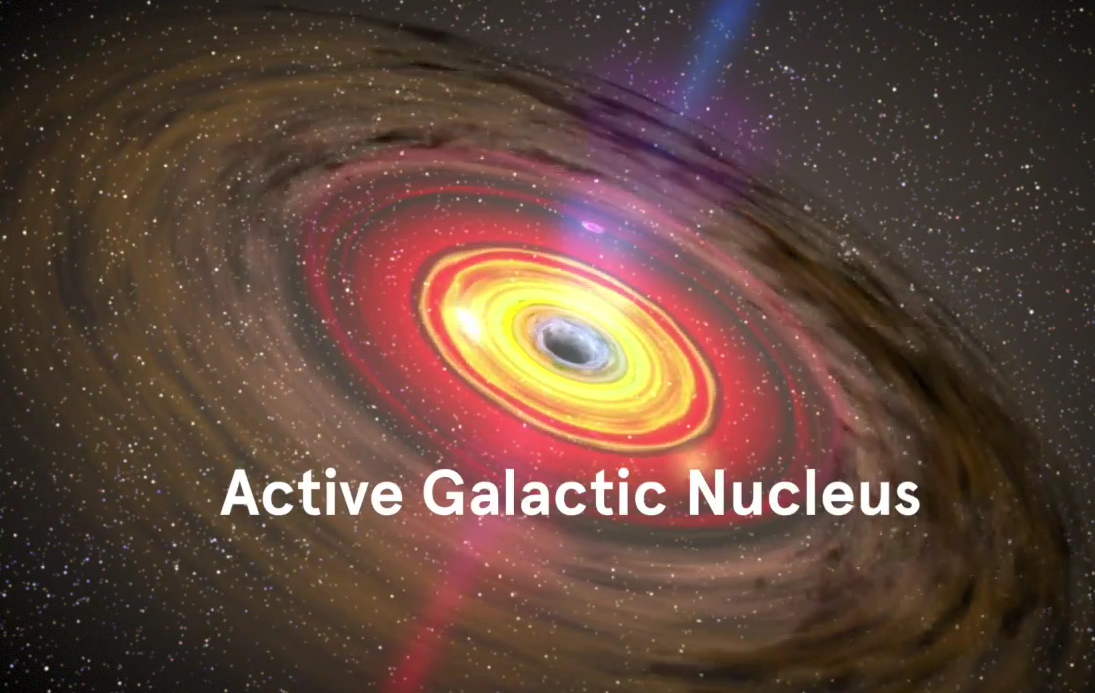

The light emitted from the AGN is significantly brighter than the rest of the galaxy and we are able to detect these QSOs out to much higher redshifts. In fact, most of the normal galaxies we have been using to create our models have redshifts less than z≈0.4, while the QSOs have redshifts all the way out to z≈6. Due to this contribution from the AGN, the flux magnitudes measured at different wavelengths might not follow the typical profile we assumed when predicting redshifts.

# Exercise

In the next question, which you are going to solve by yourself, you should look at whether there is a difference in the accuracy of the decision trees between QSOs and regular galaxies. Additionally, try to find the best fraction of split and test data. For more datasets of SDSS or enhanced algorithms of Decision Trees and Random Forests, you can clone this repository: https://github.com/Perun21/GRB